In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import re
import string
import gensim


In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
def preprocess(sentences):
  tweet_list = []
  filter = string.ascii_letters + " "
  lm = WordNetLemmatizer()
  for tweet in sentences:
    tweet_cleaned = re.sub(r'http\S+', '', tweet)
    tweet_cleaned = "".join([chr for chr in tweet_cleaned if chr in filter])
    tweet_cleaned = tweet_cleaned.lower()
    tokens = word_tokenize(tweet_cleaned)
    clean_list = [word for word in tokens if word not in stopwords.words('english')]
    clean_list = [lm.lemmatize(word) for word in clean_list]
    tweet_cleaned = " ".join(clean_list)
    tweet_list.append(tweet_cleaned)

  return np.array(tweet_list)

In [4]:
# preprocess data
df["text"] = preprocess(df["text"])

In [241]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive u,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,resident asked shelter place notified officer ...,1
3,6,NaN,NaN,people receive wildfire evacuation order calif...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfire pour...,1


In [5]:
df["text"].duplicated().sum()

764

In [6]:
# drop duplicates
df["text"].duplicated().sum()
df.drop_duplicates(subset = ["text"], inplace = True)

In [7]:
X = df["text"]
y = df["target"]

In [8]:
# Spliting into train and test
from sklearn.model_selection import train_test_split

X_train, X_text, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
print(f"Shape of X_train is {X_train.shape}")
print(f"Shape of X_text is {X_text.shape}")
print(f"Shape of y_train is {y_train.shape}")
print(f"Shape of y_test is {y_test.shape}")

Shape of X_train is (5479,)
Shape of X_text is (1370,)
Shape of y_train is (5479,)
Shape of y_test is (1370,)


In [9]:
X_train.head()

6704                                         hear thunder
3013    need dust storm film asapalsowatches trailer t...
5674                    rescued med migrant arrive sicily
5197    look like soundcloud profile shall nothing lef...
7045              gpm satellite bullseye typhoon soudelor
Name: text, dtype: object

In [10]:
tweet_len = []
for tweet in X_train:
    tweet_len.append(len(tweet.split()))
    
pd.Series(tweet_len).describe()

count    5479.000000
mean        9.096733
std         3.550932
min         1.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        23.000000
dtype: float64

In [ ]:
df['tokenized_tweets'] 

0           [this, is, a, sample, tweet]
1    [another, tweet, with, more, words]
2    [this, is, another, example, tweet]
Name: tokenized_tweets, dtype: object

<Axes: ylabel='Density'>

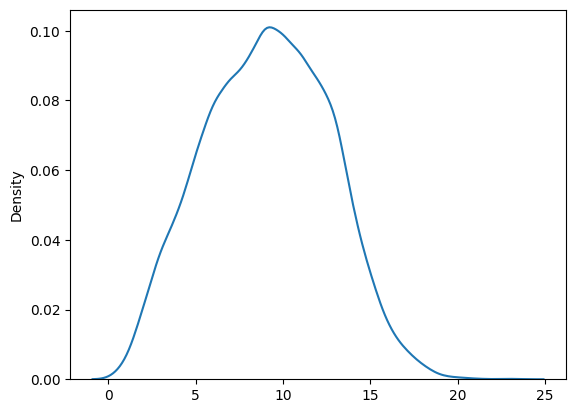

In [11]:
sns.kdeplot(tweet_len)

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization  #https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [13]:
# This work same as .fit
text_vectorizer.adapt(X_train)

In [15]:
import random

random.choice(range(len(X_train)))

4913

In [16]:
import random 
random_index = random.choice(range(len(X_train)))
tweet = X_train.iloc[random_index]
print(tweet)

text_vectorizer(tweet)

long lord study sixth seal open event revelation political upheaval roman


<tf.Tensor: shape=(11,), dtype=int64, numpy=
array([ 347,  574, 1686, 3452, 3503,  627,  692, 7099, 1323,  441, 7007],
      dtype=int64)>

In [17]:
text_vectorizer("hjgfhjdg djshflihlkjdsaf")

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 1], dtype=int64)>

In [18]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab)

13572

In [19]:
words_in_vocab[-1000:]

['brothernlaw',
 'broseidonrex',
 'bros',
 'brooo',
 'brooktekle',
 'brookesddl',
 'brooke',
 'bronx',
 'bronville',
 'bromleythe',
 'brodyfrieling',
 'brockton',
 'brochure',
 'brobread',
 'broader',
 'broadcasting',
 'broadcast',
 'brixton',
 'brittsand',
 'brittanypetko',
 'bristol',
 'brisk',
 'brisbane',
 'brinx',
 'brinco',
 'brilliant',
 'brighton',
 'brightly',
 'brightening',
 'brig',
 'briefcase',
 'bridgework',
 'bridgetown',
 'bridgeport',
 'brics',
 'brianroemmele',
 'briannafrost',
 'brewer',
 'brentobento',
 'brenas',
 'bremorrow',
 'breivik',
 'breitbartnews',
 'breemars',
 'breeder',
 'breed',
 'bred',
 'breathing',
 'breast',
 'breakth',
 'breakingnewslh',
 'breakingfalling',
 'breakfastone',
 'breachgamingorg',
 'breach',
 'brbrs',
 'brb',
 'brazilian',
 'bravery',
 'brasswork',
 'brass',
 'branch',
 'brainless',
 'brahman',
 'bradley',
 'bradford',
 'bracket',
 'bracing',
 'bracelet',
 'brace',
 'br',
 'boylesports',
 'boyinahorsemask',
 'boyhaus',
 'boyd',
 'boycot

In [21]:
tweet_len = []
for tweet in X_train:
    tweet_len.append(len(tweet.split()))

pd.Series(tweet_len).describe()

count    5479.000000
mean        9.096733
std         3.550932
min         1.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        23.000000
dtype: float64

<Axes: ylabel='Density'>

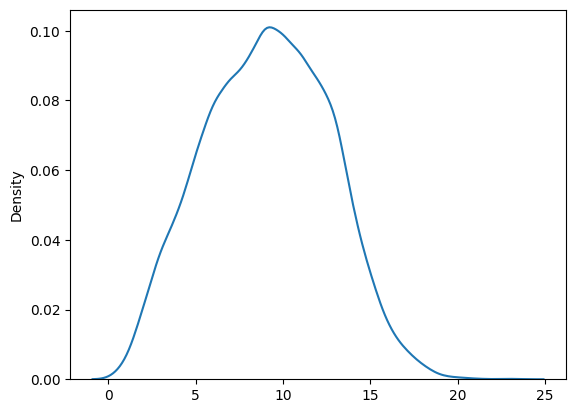

In [22]:
sns.kdeplot(tweet_len)